# 4. Connected Component

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def four_connected(V, pix):
    connected= []
    row_mov= [0, 1]
    col_mov= [1, 0]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(2):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [3]:
def eight_connected(V, pix):
    connected= []
    row_mov= [-1, -1, 0, 1]
    col_mov= [0, 1, 1, 1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [4]:
def M_connected(V, pix):
    connected= []
    row_mov= [-1, 0, 1, 0]
    col_mov= [0, 1, 0, -1]
    row_diag= [-1, 1, 1, -1]
    col_diag= [1, 1, -1, -1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                flag= []
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    flag.append(False)
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
                        flag[k]= True
                flag= flag+ flag
                for k in range(4):
                    cur_r= i+ row_diag[k]
                    cur_c= j+ col_diag[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        if flag[k: k+2] ==[False, False]:
                            connected.append((i, j, cur_r, cur_c))
    return connected

In [5]:
def get_component4(V, data1, component, si, sj):
    data= data1.copy()
    for i in range(data1.shape[0]):
        for j in range(data1.shape[1]):
            if data1[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    row_mov4= [-1, 0, 1, 0]
    col_mov4= [0, 1, 0, -1]
    queue= []
    queue.append((si, sj))
    
    data[si][sj]= 0
    while len(queue)!=0:
        cur= queue[0]
        component.append(cur)
        queue.pop(0)
        for k in range(4):
            cur_row= cur[0]+ row_mov4[k]
            cur_col= cur[1]+ col_mov4[k]
            if cur_row< data.shape[0] and cur_col< data.shape[1] and cur_row>= 0 and cur_col>= 0 and data[cur_row][cur_col]==1:
                data[cur_row][cur_col]= 0
                queue.append((cur_row, cur_col))

def get_component8(V, data1, component, si, sj):
    data= data1.copy()
    for i in range(data1.shape[0]):
        for j in range(data1.shape[1]):
            if data1[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    row_mov8= [-1, -1, 0, 1, 1, 1, 0, -1]
    col_mov8= [0, 1, 1, 1, 0, -1, -1, -1]
    queue= []
    queue.append((si, sj))
    
    data[si][sj]= 0
    while len(queue)!=0:
        cur= queue[0]
        component.append(cur)
        queue.pop(0)
        for k in range(8):
            cur_row= cur[0]+ row_mov8[k]
            cur_col= cur[1]+ col_mov8[k]
            if cur_row< data.shape[0] and cur_col< data.shape[1] and cur_row>= 0 and cur_col>= 0 and data[cur_row][cur_col]==1:
                data[cur_row][cur_col]= 0
                queue.append((cur_row, cur_col))

def get_componentM(V, data1, component, si, sj):
    data= data1.copy()
    for i in range(data1.shape[0]):
        for j in range(data1.shape[1]):
            if data1[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    row_mov4=[-1, 0, 1, 0]
    col_mov4= [0, 1, 0, -1]
    row_diag= [-1, 1, 1, -1]
    col_diag= [1, 1, -1, -1]
    queue= []
    queue.append((si, sj))
    data[si][sj]= 0
    while len(queue)!=0:
        cur= queue.pop(0)
        component.append(cur)
        flag= []
        for k in range(4):
            flag.append(False)
            nxt_r= cur[0]+ row_mov4[k]
            nxt_c= cur[1]+ col_mov4[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                flag[k]= True
                data[nxt_r][nxt_c]= 0
                queue.append((nxt_r, nxt_c))
        flag= flag+ flag
        for k in range(4):
            nxt_r= cur[0]+ row_diag[k]
            nxt_c= cur[1]+ col_diag[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                if flag[k: k+2] ==[False, False]:
                    data[nxt_r][nxt_c]= 0
                    queue.append((nxt_r, nxt_c))
                
def connected_comp(V, pix, type_of_connectivity= 'M'):
    data= pix.copy()
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    components= []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i][j]==1:
                component= []
                if type_of_connectivity=='4':
                    get_component4(data, component, i, j)
                    components.append(component)
                elif type_of_connectivity=='8':
                    get_component8(data, component, i, j)
                    components.append(component)
                elif type_of_connectivity=='M':
                    get_componentM(data, component, i, j)
                    components.append(component)
    return components

# User Matrix

In [6]:
V= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))
V

Enter space separated allowed pixel values: 0 1


array([0, 1])

In [7]:
# n, m= map(int, input("Enter size of matrix(n, m): ").split())
# print("Enter matrix values: ")
# l= []
# for i in range(n):
#     _= np.array(list(map(int, input().split())))
#     l.append(_)
# pix= np.array(l)
pix= np.array([[3, 1, 2, 1], [2, 2, 0, 2], [1, 2, 1, 1], [1, 0, 1, 2]])

In [8]:
px, py= map(int, input("Enter pixel position: ").split())

Enter pixel position: 3 0


In [9]:
component4= []
get_component4(V, pix, component4, px, py)
component4

[(3, 0), (2, 0), (3, 1), (3, 2), (2, 2), (1, 2), (2, 3)]

In [10]:
component8= []
get_component8(V, pix, component8, px, py)
component8

[(3, 0), (2, 0), (3, 1), (2, 2), (3, 2), (1, 2), (2, 3), (0, 3), (0, 1)]

In [11]:
componentM= []
get_componentM(V, pix, componentM, px, py)
componentM

[(3, 0), (2, 0), (3, 1), (3, 2), (2, 2), (1, 2), (2, 3), (0, 3), (0, 1)]

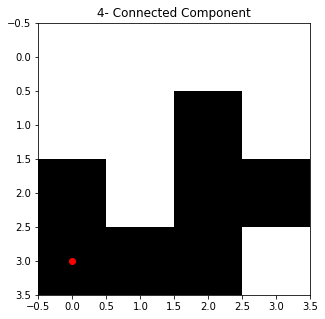

In [12]:
plt.figure(figsize=(5, 5))
data= np.zeros((pix.shape[0], pix.shape[1]))
for i in component4:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py, px, 'ro' )
plt.title('4- Connected Component')
plt.show()

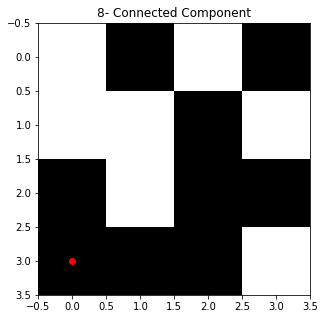

In [13]:
plt.figure(figsize=(5, 5))
data= np.zeros((pix.shape[0], pix.shape[1]))
for i in component8:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py, px, 'ro' )
plt.title('8- Connected Component')
plt.show()

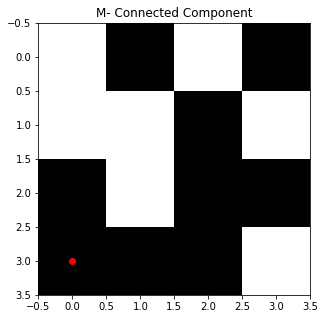

In [15]:
plt.figure(figsize=(5, 5))
data= np.zeros((pix.shape[0], pix.shape[1]))
for i in componentM:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py, px, 'ro' )
plt.title('M- Connected Component')
plt.show()

# Image

In [16]:
import cv2

In [17]:
img= cv2.imread('./Images/flower_gray.png', 0)

In [18]:
# V_img= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))
# V_img

In [21]:
px_img, py_img= map(int, input("Enter pixel position: ").split())

Enter pixel position: 12 3


In [22]:
component_img4= []
# get_component4(V_img, img, component_img4, px_img, py_img)
get_component4(np.arange(20, 40), img, component_img4, px_img, py_img)

In [23]:
component_img8= []
# get_component4(V_img, img, component_img8, px_img, py_img)
get_component8(np.arange(20, 40), img, component_img8, px_img, py_img)

In [24]:
component_imgM= []
# get_component4(V_img, img, component_imgM, px_img, py_img)
get_componentM(np.arange(20, 40), img, component_imgM, px_img, py_img)

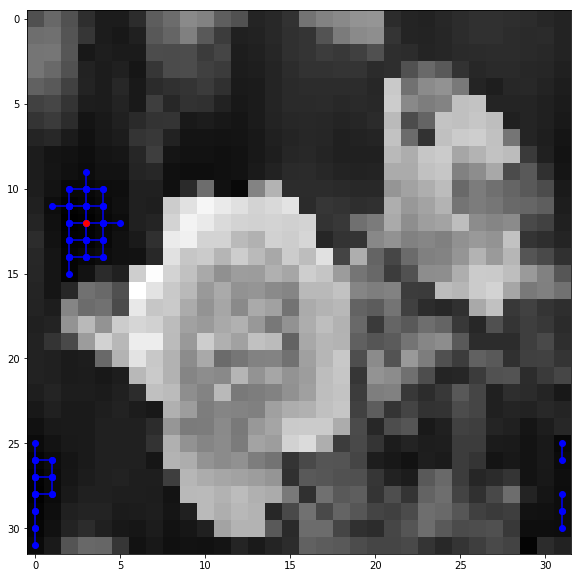

In [25]:
connected4= four_connected(np.arange(20, 40), img)

plt.figure(figsize= (10, 10))
plt.imshow(img, cmap= 'gray')
for i in connected4:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'b', marker= 'o')

plt.plot(py_img, px_img, 'r', marker= 'o')
plt.show()


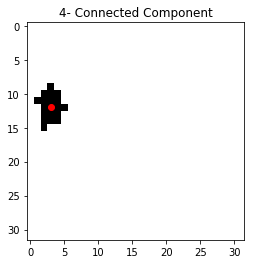

In [26]:
data= np.zeros((img.shape[0], img.shape[1]))
for i in component_img4:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py_img, px_img, 'ro' )
plt.title('4- Connected Component')
plt.show()

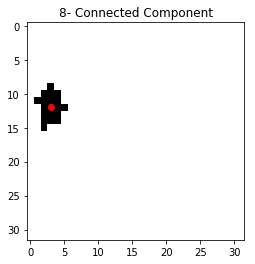

In [27]:
data= np.zeros((img.shape[0], img.shape[1]))
for i in component_img8:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py_img, px_img, 'ro' )
plt.title('8- Connected Component')
plt.show()

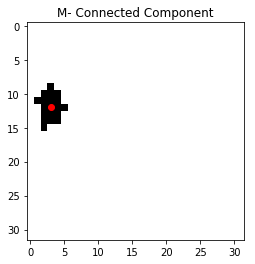

In [28]:
data= np.zeros((img.shape[0], img.shape[1]))
for i in component_imgM:
    data[i[0], i[1]]= 1
    
plt.imshow(data, cmap= 'binary')
plt.plot(py_img, px_img, 'ro' )
plt.title('M- Connected Component')
plt.show()